# Polynomial Regression

Demonstrating a linear regression on a random polynomial dataset. The regular linear model fails miserably but adding polynomial features to the dataset allows the linear regression to regress the polynomial accurately. 

Plain Regression Score: 0.007991953734392765


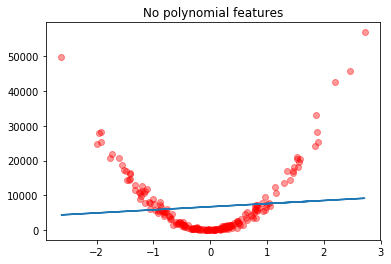

Polynomial Regression Score: 0.9857330649232254


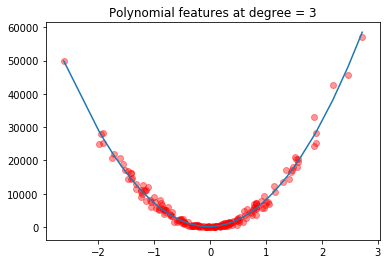

Predicting a new value at 2: [31736.53012503]
Predicting a new value at 3: [71129.06058278]


In [12]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#generate some random data
X,y = datasets.make_regression( n_samples=200, n_features=1, noise=7, bias=2, random_state=42)
y = y**2

#linear only
reg = LinearRegression()
reg.fit(X, y)
print("Plain Regression Score: {}".format(reg.score(X, y)))

plt.scatter(X, y, color='red', alpha=0.4)
plt.plot(X, reg.predict(X))
plt.title("No polynomial features")
plt.show()

#linear with polynomial feature
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree = 3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

pred = poly_model.predict(X_poly)

print("Polynomial Regression Score: {}".format(poly_model.score(X_poly, y)))

new_X, new_y = zip(*sorted(zip(X, pred))) # sort the values
plt.plot(new_X, new_y)
plt.scatter(X,y, color='red', alpha=0.4)
plt.title("Polynomial features at degree = 3")
plt.show()

print("Predicting a new value at 2: {}".format(poly_model.predict(poly_features.fit_transform(2))))
print("Predicting a new value at 3: {}".format(poly_model.predict(poly_features.fit_transform(3))))